<a href="https://colab.research.google.com/github/jmins33/Pandas/blob/master/3starscard/3starscard_201905.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Google Drive 연동

In [36]:
# Mount Google Drive
from google.colab import drive # import drive from google colab

ROOT = "/content/drive"     # default location for the drive
print(ROOT)                 # print content of ROOT (Optional)
drive.mount(ROOT)           # we mount the google drive at /content/drive

/content/drive
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [37]:
# import join used to join ROOT path and MY_GOOGLE_DRIVE_PATH
from os.path import join  

# path to your project on Google Drive
MY_GOOGLE_DRIVE_PATH = 'My Drive/3starcard'
PROJECT_PATH = join(ROOT, MY_GOOGLE_DRIVE_PATH)

In [38]:
%cd "{PROJECT_PATH}"
!ls

/content/drive/My Drive/3starcard
'[기타] SCDC_공모전 테이블 설명.xlsx'  '[Track1_데이터4] variable_dtype.xlsx'
'[Track1_데이터1] mrc_info.csv'        '[Track2_데이터1] trend_w_demo.csv'
'[Track1_데이터2] samp_train.csv'      '[Track2_데이터2] 업종_예시.xlsx'
'[Track1_데이터3] samp_cst_feat.csv'


## 데이터 불러오기
- 2019년 5월 데이터
- 2030으로 보이는 연령대
- 기혼스코어에 따른 업종

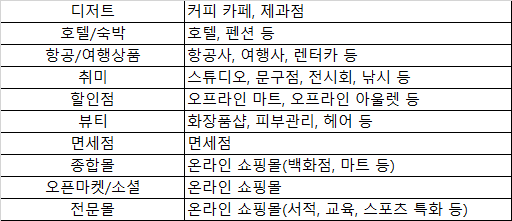

In [39]:
trend = pd.read_csv('[Track2_데이터1] trend_w_demo.csv', encoding='CP949')
trend

,YM,Category,성별구분,연령대,기혼스코어,유아자녀스코어,초등학생자녀스코어,중고생자녀스코어,대학생자녀스코어,전업주부스코어
0,202005,할인점,0,F,high,low,high,mid,low,low
1,202005,취미,0,B,high,low,mid,mid,low,low
2,202005,오픈마켓/소셜,1,D,mid,mid,mid,mid,low,mid
3,202005,뷰티,0,D,mid,mid,mid,mid,low,low
4,202005,오픈마켓/소셜,0,G,high,low,mid,mid,mid,low
...,...,...,...,...,...,...,...,...,...,...
452033,201904,전문몰,0,E,low,mid,low,low,low,low
452034,201904,할인점,0,H,high,low,low,low,low,low
452035,201904,할인점,1,H,high,low,low,low,low,low
452036,201904,할인점,0,H,high,low,low,low,low,low


In [40]:
s201905 = trend[trend.YM==201905]
s201905

,YM,Category,성별구분,연령대,기혼스코어,유아자녀스코어,초등학생자녀스코어,중고생자녀스코어,대학생자녀스코어,전업주부스코어
210468,201905,전문몰,1,E,low,low,low,low,low,mid
210469,201905,전문몰,1,E,mid,mid,low,low,low,mid
210470,201905,할인점,1,F,high,low,mid,mid,mid,mid
210471,201905,전문몰,0,G,high,low,mid,mid,mid,low
210472,201905,전문몰,1,H,high,low,low,low,mid,mid
...,...,...,...,...,...,...,...,...,...,...
331914,201905,디저트,1,D,high,mid,low,mid,low,mid
331915,201905,할인점,0,B,high,low,high,mid,low,low
331916,201905,호텔/숙박,0,F,high,low,mid,mid,mid,low
331917,201905,면세점,1,B,high,low,high,mid,mid,mid


In [41]:
s201905.연령대.value_counts()

D    20879
A    18997
F    18381
E    15826
C    15024
G    13358
H     9637
B     9349
Name: 연령대, dtype: int64

- 기혼스코어 low인 사람들

In [42]:
unmarried = s201905[s201905.기혼스코어 =='low']
unmarried.연령대.value_counts()
# E가 많다

E    9164
C     120
Name: 연령대, dtype: int64

In [43]:
unmarried.Category.value_counts()
# 전문몰 - 온라인 쇼핑몰(서적, 교육, 스포츠 특화 등)  2481
# 디저트 - 커피 카페, 제과점
# 오픈마켓/소셜 - 온라인 쇼핑몰

전문몰        2481
디저트        1945
오픈마켓/소셜    1590
할인점         917
뷰티          862
취미          759
호텔/숙박       295
종합몰         215
항공/여행사      162
면세점          58
Name: Category, dtype: int64

In [44]:
unmarried.성별구분.value_counts()

1    5457
0    3827
Name: 성별구분, dtype: int64

In [45]:
unmarried.유아자녀스코어.value_counts()  # 유아자녀 60명  # 자녀도 없고 기혼도 아닌 사람 5509명

low     5509
mid     3715
high      60
Name: 유아자녀스코어, dtype: int64

In [46]:
unmarried.초등학생자녀스코어.value_counts()  # 초등학생 자녀 109명 오차범위 11

low     9164
high     109
mid       11
Name: 초등학생자녀스코어, dtype: int64

In [47]:
unmarried.중고생자녀스코어.value_counts()  # 중고생자녀 X

low    9284
Name: 중고생자녀스코어, dtype: int64

In [48]:
unmarried.대학생자녀스코어.value_counts()  # 대학생자녀X

low    9284
Name: 대학생자녀스코어, dtype: int64

In [49]:
unmarried.전업주부스코어.value_counts()   # 전업주부가 아닌 사람 4376명, 전업주부인 사람 60

mid     4848
low     4376
high      60
Name: 전업주부스코어, dtype: int64

- 기혼스코어 mid 인 사람들
- 기혼인지 미혼인지 애매
- 자녀스코어로 판단

In [50]:
notsure = s201905[s201905.기혼스코어 =='mid']
notsure

,YM,Category,성별구분,연령대,기혼스코어,유아자녀스코어,초등학생자녀스코어,중고생자녀스코어,대학생자녀스코어,전업주부스코어
210469,201905,전문몰,1,E,mid,mid,low,low,low,mid
210477,201905,디저트,1,D,mid,high,mid,mid,low,mid
210479,201905,오픈마켓/소셜,0,C,mid,mid,high,low,low,low
210482,201905,전문몰,1,E,mid,high,low,low,low,mid
210483,201905,전문몰,0,C,mid,high,mid,low,low,low
...,...,...,...,...,...,...,...,...,...,...
331892,201905,디저트,1,D,mid,mid,low,mid,low,mid
331901,201905,면세점,1,C,mid,mid,mid,low,low,mid
331902,201905,오픈마켓/소셜,0,C,mid,mid,high,low,low,low
331903,201905,취미,0,E,mid,mid,low,low,low,low


In [51]:
notsure.Category.value_counts()
# 전문몰 - 온라인 쇼핑몰(서적, 교육, 스포츠 특화 등)  2481
# 디저트 - 커피 카페, 제과점
# 오픈마켓/소셜 - 온라인 쇼핑몰

전문몰        7801
오픈마켓/소셜    5657
디저트        5520
할인점        4419
뷰티         1485
종합몰        1191
취미         1187
호텔/숙박       575
항공/여행사      570
면세점         217
Name: Category, dtype: int64

In [52]:
notsure.연령대.value_counts()   
# D가 추가되었다.
# C도 늘었고 120->12152
# E는 줄었다.

C    12152
D    10529
E     5941
Name: 연령대, dtype: int64

In [53]:
notsure.성별구분.value_counts()

1    15449
0    13173
Name: 성별구분, dtype: int64

In [54]:
notsure.유아자녀스코어.value_counts()

mid     23715
high     3683
low      1224
Name: 유아자녀스코어, dtype: int64

In [55]:
notsure.초등학생자녀스코어.value_counts()

mid     12744
low      9988
high     5890
Name: 초등학생자녀스코어, dtype: int64

In [56]:
notsure.중고생자녀스코어.value_counts()

low     18112
mid     10412
high       98
Name: 중고생자녀스코어, dtype: int64

In [57]:
notsure.대학생자녀스코어.value_counts()

low    28622
Name: 대학생자녀스코어, dtype: int64

In [58]:
notsure.전업주부스코어.value_counts()

low     14363
mid     13080
high     1179
Name: 전업주부스코어, dtype: int64

- 기혼스코어 high
- 결혼 확률이 높은 사람들

In [59]:
married= s201905[s201905.기혼스코어 =='high']
married
# 총 83545

,YM,Category,성별구분,연령대,기혼스코어,유아자녀스코어,초등학생자녀스코어,중고생자녀스코어,대학생자녀스코어,전업주부스코어
210470,201905,할인점,1,F,high,low,mid,mid,mid,mid
210471,201905,전문몰,0,G,high,low,mid,mid,mid,low
210472,201905,전문몰,1,H,high,low,low,low,mid,mid
210473,201905,디저트,1,D,high,high,mid,mid,low,mid
210474,201905,전문몰,0,H,high,low,low,low,low,low
...,...,...,...,...,...,...,...,...,...,...
331913,201905,할인점,1,B,high,low,mid,mid,low,mid
331914,201905,디저트,1,D,high,mid,low,mid,low,mid
331915,201905,할인점,0,B,high,low,high,mid,low,low
331916,201905,호텔/숙박,0,F,high,low,mid,mid,mid,low


In [60]:
married.Category.value_counts()
# 전문몰 - 온라인 쇼핑몰(서적, 교육, 스포츠 특화 등)  2481
# 할인점 - 오프라인 마트, 오프라인 아울렛 등
# 디저트 - 커피 카페, 제과점

전문몰        21373
할인점        19880
디저트        16355
오픈마켓/소셜    12096
뷰티          3783
취미          3561
종합몰         2769
호텔/숙박       1644
항공/여행사      1433
면세점          651
Name: Category, dtype: int64

In [61]:
married.성별구분.value_counts()

1    43945
0    39600
Name: 성별구분, dtype: int64

In [62]:
married.연령대.value_counts()
# 연령대가 다 생김
# E 721명

A    18997
F    18381
G    13358
D    10350
H     9637
B     9349
C     2752
E      721
Name: 연령대, dtype: int64

In [63]:
married.유아자녀스코어.value_counts()  # 유아 4681

low     55856
mid     23008
high     4681
Name: 유아자녀스코어, dtype: int64

In [64]:
married.초등학생자녀스코어.value_counts() # 초등학생 17268

low     33181
mid     33096
high    17268
Name: 초등학생자녀스코어, dtype: int64

In [65]:
married.중고생자녀스코어.value_counts()  # 중고생 8701

mid     61294
low     13550
high     8701
Name: 중고생자녀스코어, dtype: int64

In [66]:
married.대학생자녀스코어.value_counts()  # 대학생 1005

low     56682
mid     25858
high     1005
Name: 대학생자녀스코어, dtype: int64

In [67]:
married.전업주부스코어.value_counts()

low     42521
mid     35900
high     5124
Name: 전업주부스코어, dtype: int64

### 2019.5월 데이터 시각화


In [34]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-440
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent

In [69]:
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic') 

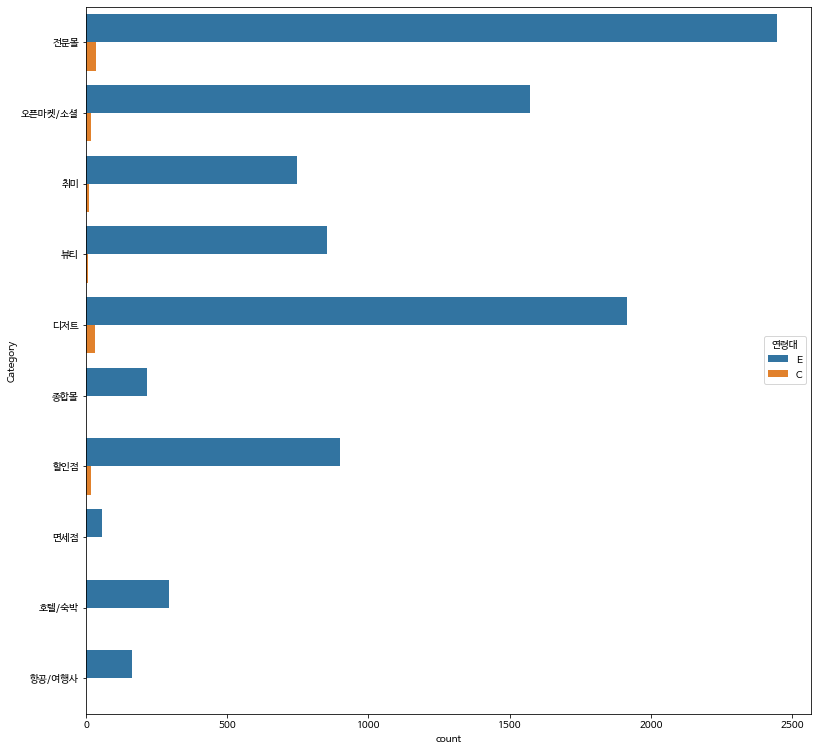

In [94]:
f, ax = plt.subplots(figsize=(13, 13))
sns.countplot(y="Category", hue="연령대", data=unmarried)
# 전문몰 - 온라인 쇼핑몰(서적, 교육, 스포츠 특화 등) 
# 디저트 - 커피 카페, 제과점
# 오픈마켓/소셜 - 온라인 쇼핑몰

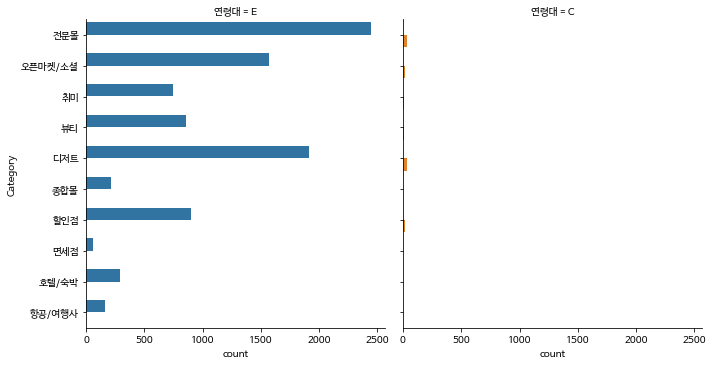

In [85]:
sns.catplot(y="Category", hue="연령대",col="연령대", kind="count", data=unmarried)

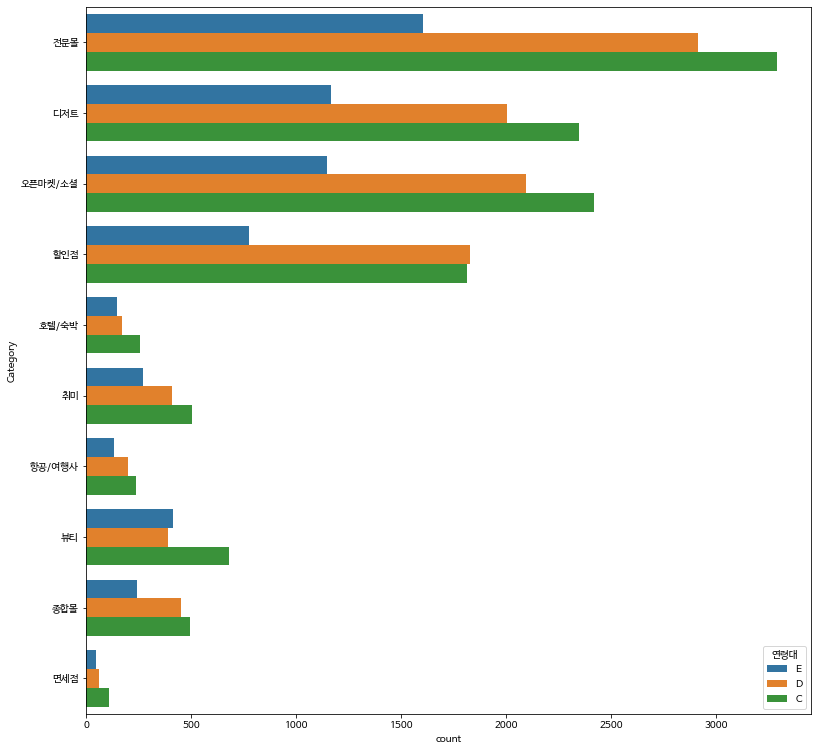

In [95]:
f, ax = plt.subplots(figsize=(13, 13))
sns.countplot(y='Category', hue="연령대", data=notsure)
# 전문몰 - 온라인 쇼핑몰(서적, 교육, 스포츠 특화 등)  2481
# 디저트 - 커피 카페, 제과점
# 오픈마켓/소셜 - 온라인 쇼핑몰

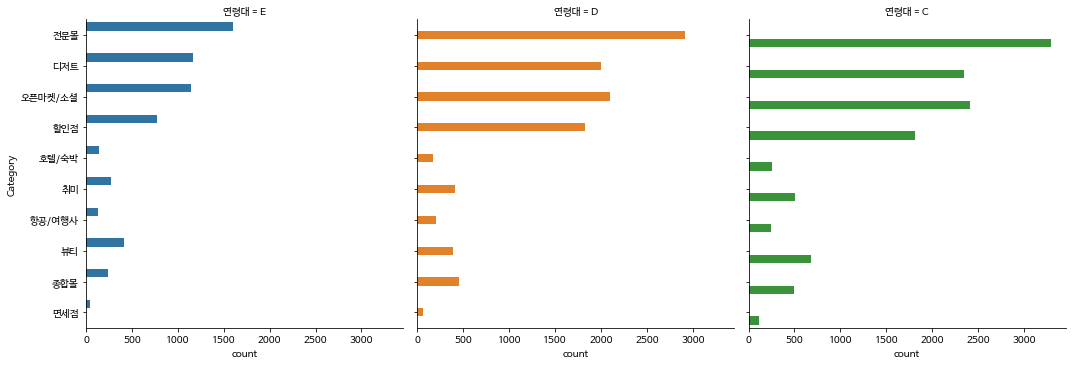

In [86]:
sns.catplot(y='Category', hue="연령대", col="연령대", kind="count", data=notsure)


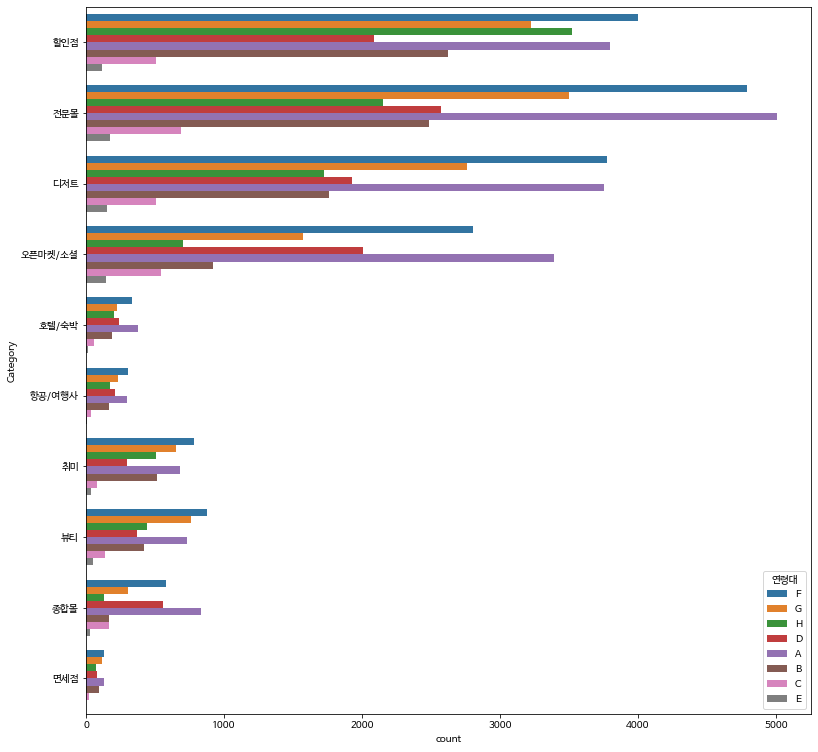

In [96]:
f, ax = plt.subplots(figsize=(13, 13))
sns.countplot(y='Category', hue="연령대", data=married)
# 전문몰 - 온라인 쇼핑몰(서적, 교육, 스포츠 특화 등)  2481
# 할인점 - 오프라인 마트, 오프라인 아울렛 등
# 디저트 - 커피 카페, 제과점

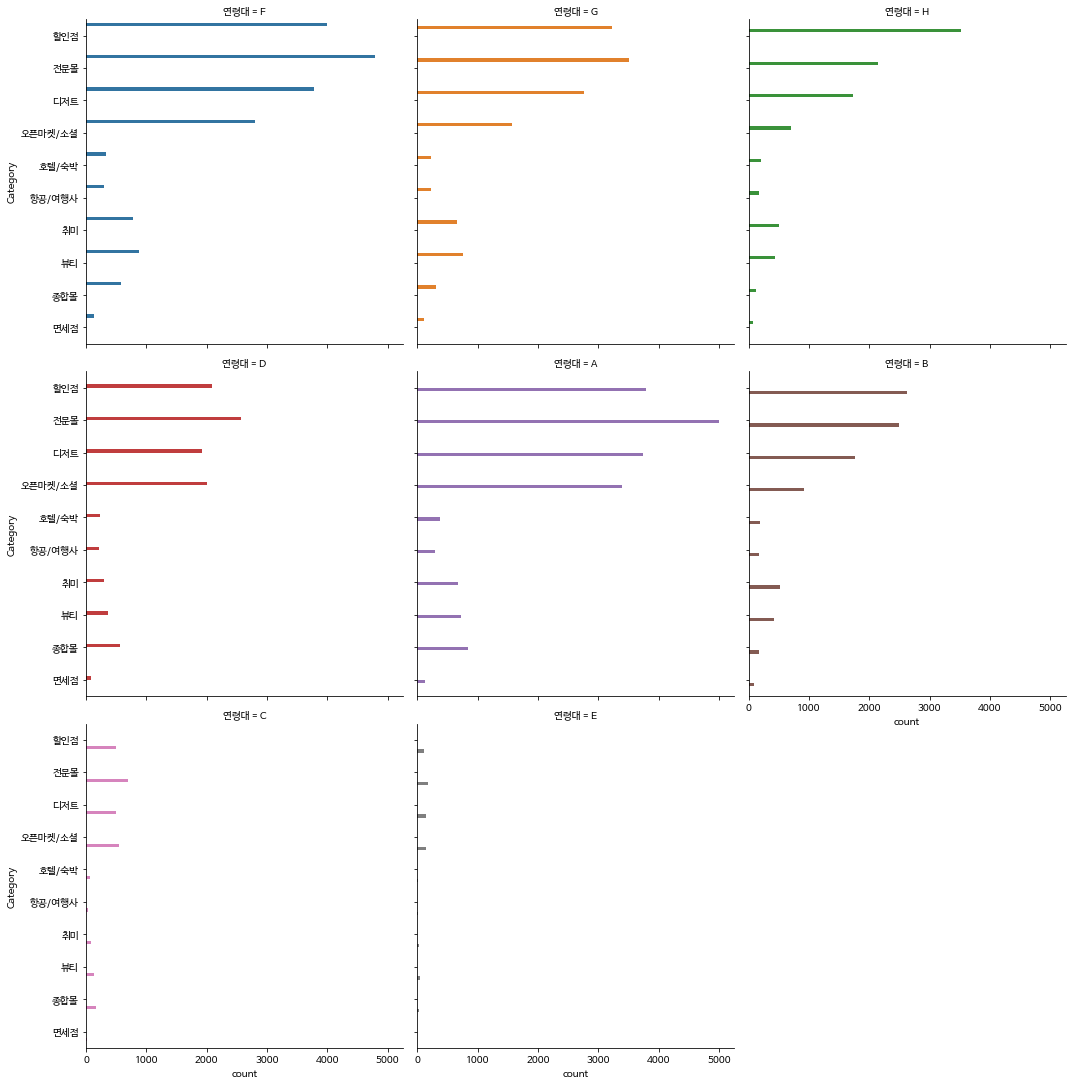

In [102]:
sns.catplot(y='Category', hue="연령대",col='연령대', col_wrap=3, kind='count', data=married)

### 신용카드를 사용하는 연령 순은 E < C < D
- E가 제일 어리고 그 다음 C, D 순으로 나이가 많아짐